<a href="https://colab.research.google.com/github/amx4/AdmisionLinearRegression_Keras_SKL_GridSearch/blob/main/admissionprediction_regression_nnetwork_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [258]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [259]:
import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/Datasets/")
print(os.getcwd())

/content/drive/MyDrive/Colab Notebooks/Datasets


In [260]:
pip install zip

  Using cached https://files.pythonhosted.org/packages/dd/31/1c0dc71cd947a5c48f18b0ff9d8fd3a0da0bad9fa63c36dfd9715676926d/zip-0.0.2.tar.gz
  Using cached https://files.pythonhosted.org/packages/79/a2/315f7657004ad65ebe13fe051afb15c5529a57bdce5f019401897e97bff7/Flask-Admin-1.5.7.tar.gz
  Using cached https://files.pythonhosted.org/packages/88/53/958ce7c2aa26280b7fd7f3eecbf13053f1302ee2acb1db58ef32e1c23c2a/Flask-Bootstrap-3.3.7.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/91/c4/f71095437bd4b691c63f240e72a20c57e2c216085cbc271f79665885d3da/Flask-Cache-0.13.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/2f/0e/f3a79f434fd4ed254ab5e0c8833660c1af974e2e216c54bd196365218e25/Flask_FlatPages-0.7.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/58/4a/b20260e8d383d0037f2791dd8a3f3ea729ca9f02d7638677a34a236a8702/Flask_Gravatar-0.5.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2b/83/ac5bf3279f969704fc1e63f

In [275]:
#ls
#import zip
#!unzip "admission zip.zip"

In [276]:
#ls

In [279]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy
import pandas
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense ,Dropout,BatchNormalization
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [280]:
df=pd.read_csv("Admission_Predict_Ver1.1.csv")
#changing names because previous names are little bit confusing
df=df.rename(index=str, columns={"GRE Score": "GRE", "TOEFL Score": "TOEFL", "Chance of Admit ": "Admission_Chance"})
#we donot need serial number so its good to drop it because its just a number
df=df.drop("Serial No.",axis=1)
df.head(10)

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admission_Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


In [281]:
df.shape

(500, 8)

In [282]:
df.describe()

,GRE,TOEFL,University Rating,SOP,LOR,CGPA,Research,Admission_Chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [326]:
print(df.isna().sum(),"\n",df.isnull().sum())

GRE                  0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admission_Chance     0
dtype: int64 
 GRE                  0
TOEFL                0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admission_Chance     0
dtype: int64


In [327]:
admit=np.asarray(df["Admission_Chance"])
len(np.unique(admit))
# different values in the coloum [ unique chance to predict]

61

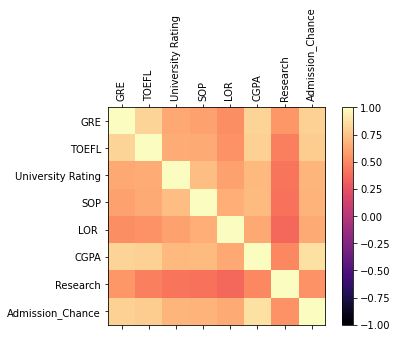

In [286]:
import pandas as pd
import matplotlib.pyplot as plt
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='magma', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

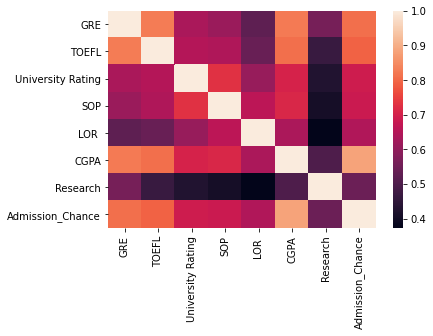

In [287]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

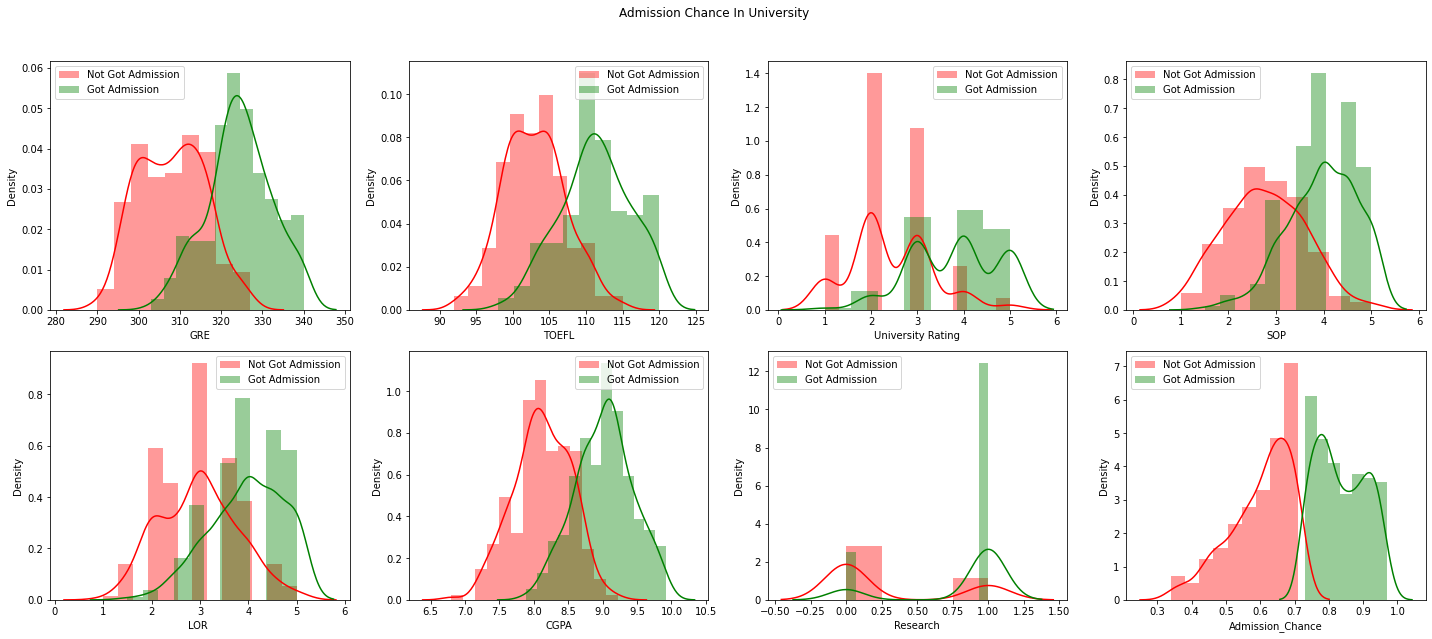

In [288]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in df.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(df[i][df['Admission_Chance']<0.72], color='r', label = 'Not Got Admission')
    sns.distplot(df[i][df['Admission_Chance']>0.72], color='g', label = 'Got Admission')
    plt.legend(loc='best')
fig.suptitle('Admission Chance In University ')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

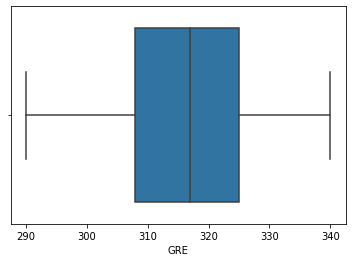

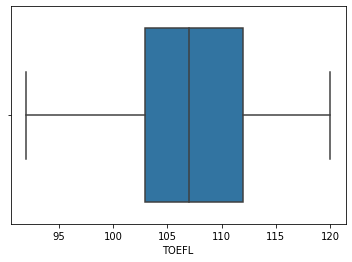

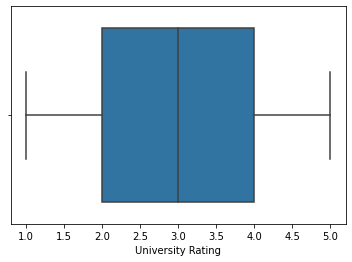

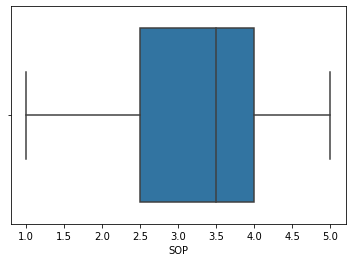

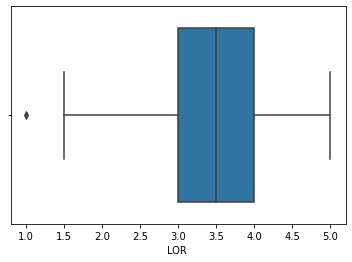

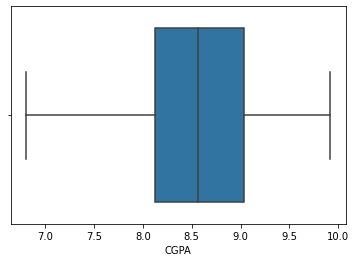

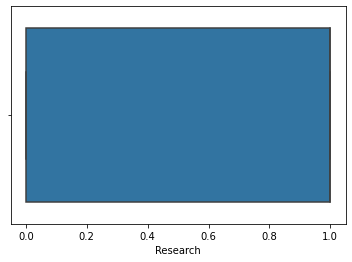

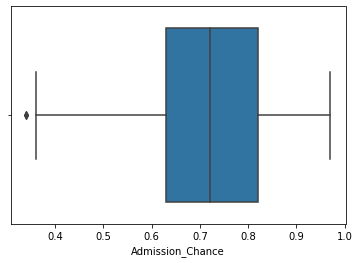

In [289]:
for column in df:
    plt.figure()
    sns.boxplot(x=df[column])

**there are no outliers**

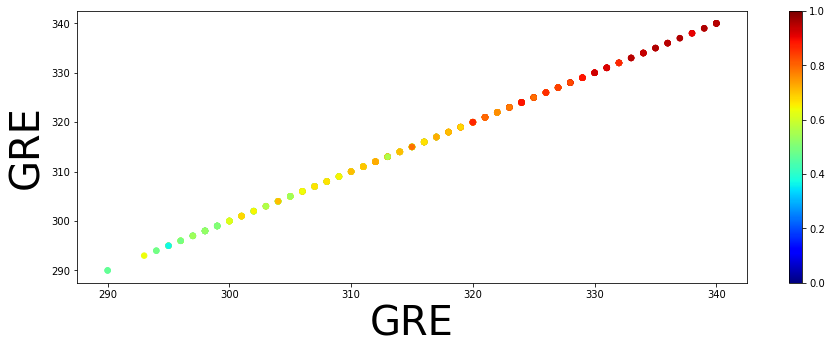

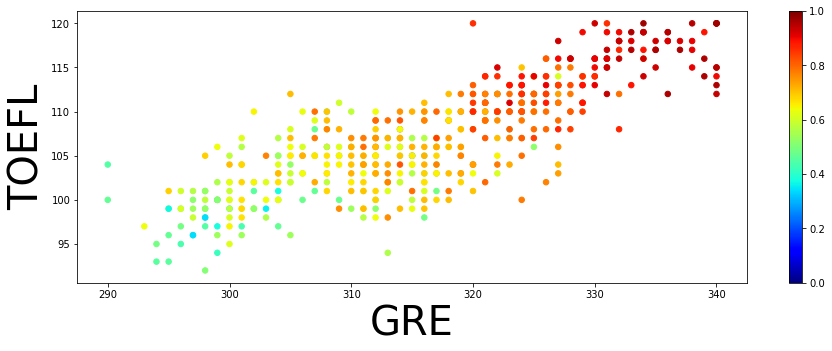

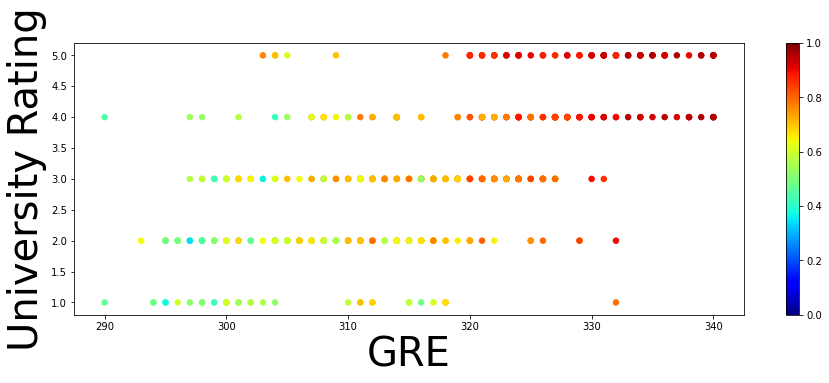

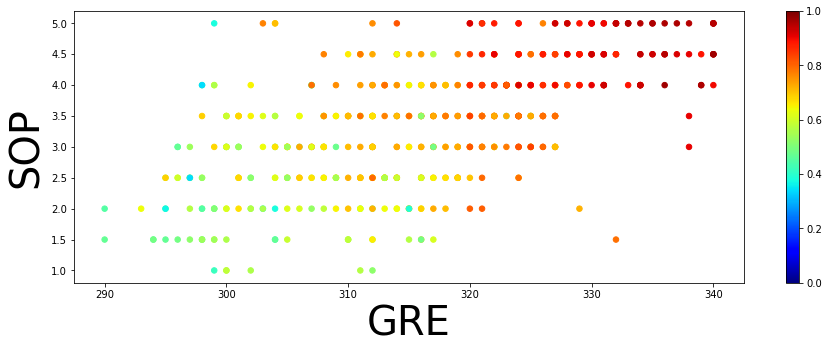

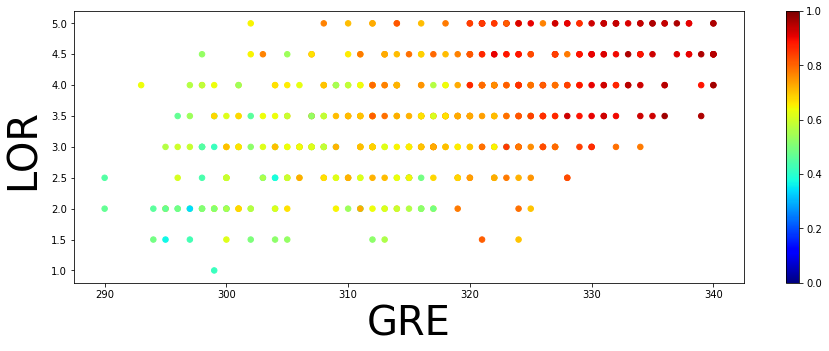

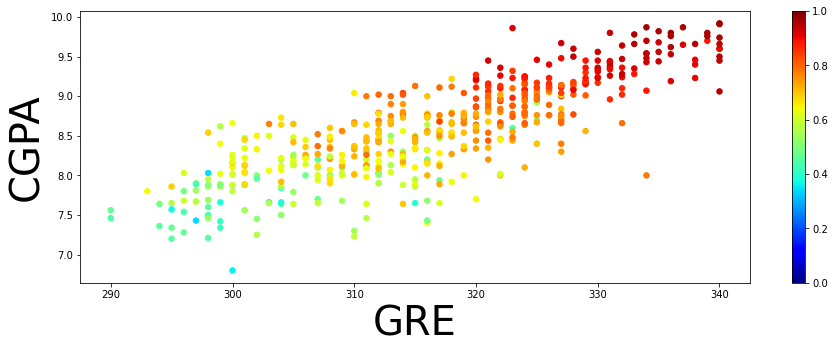

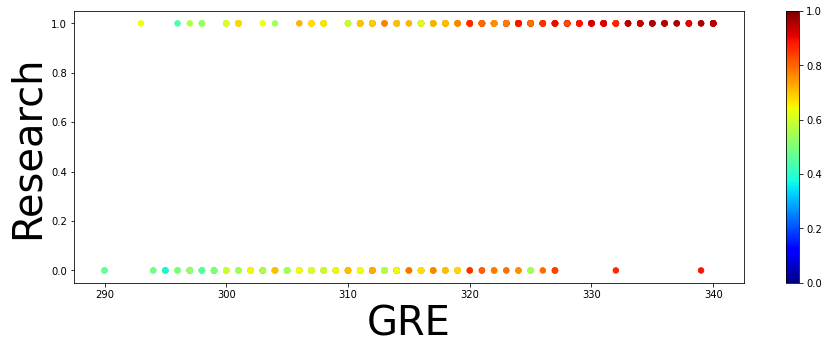

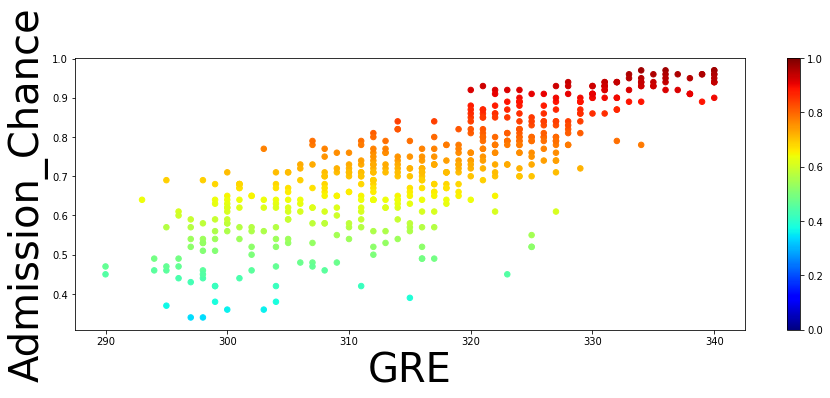

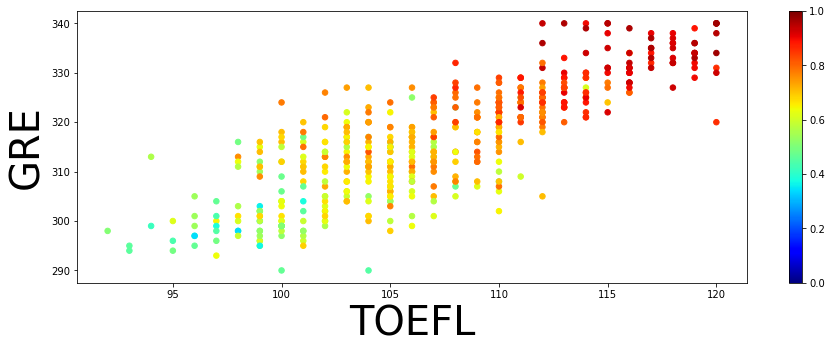

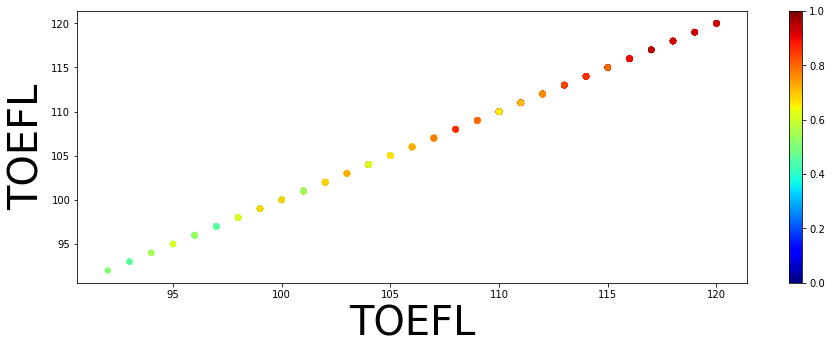

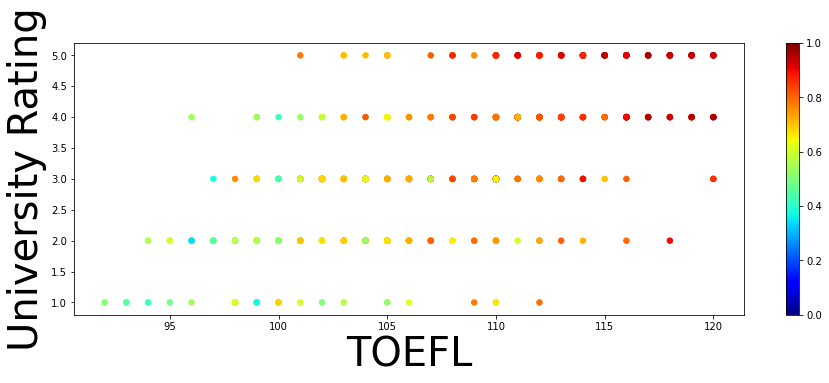

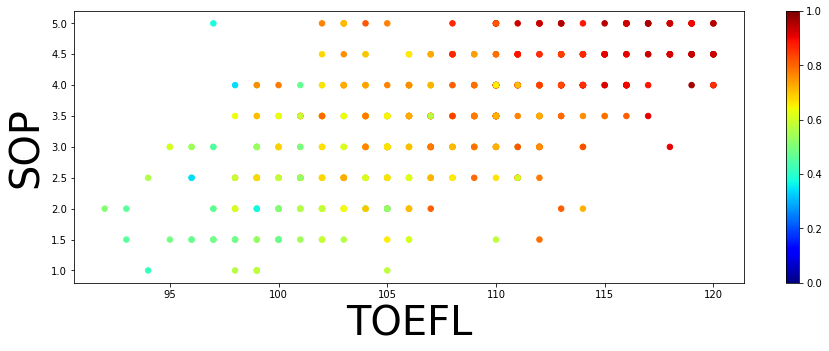

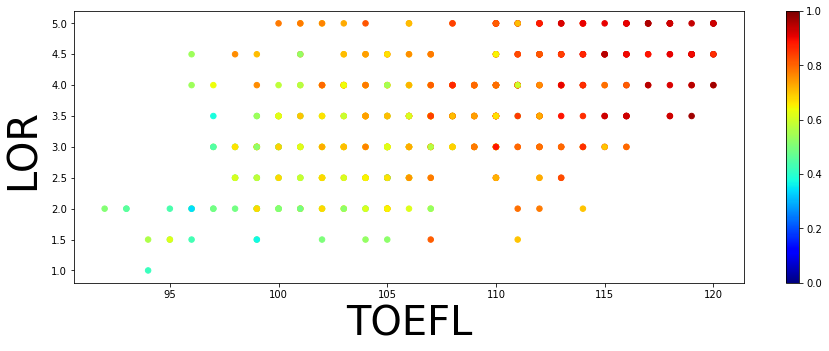

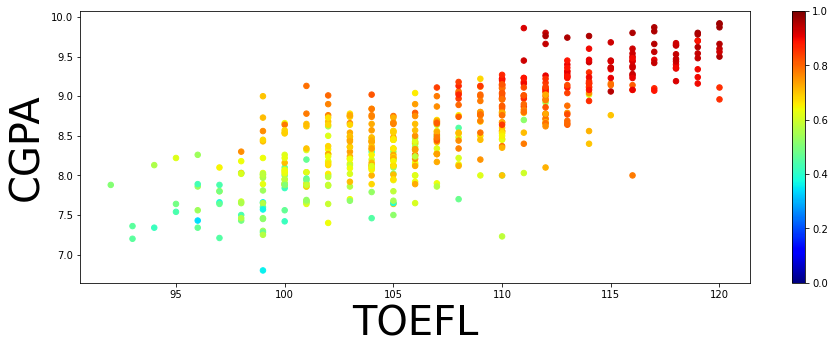

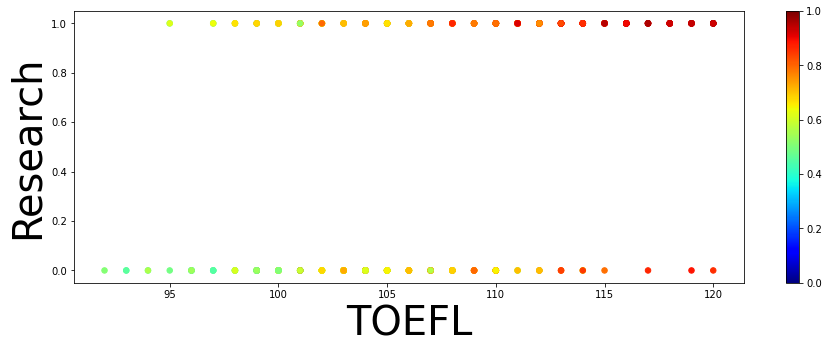

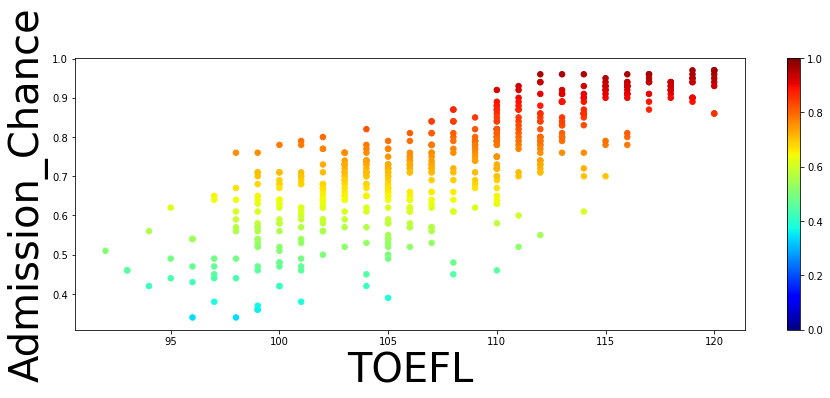

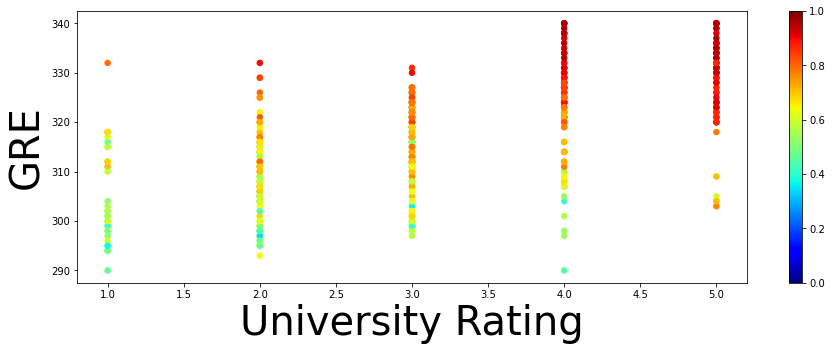

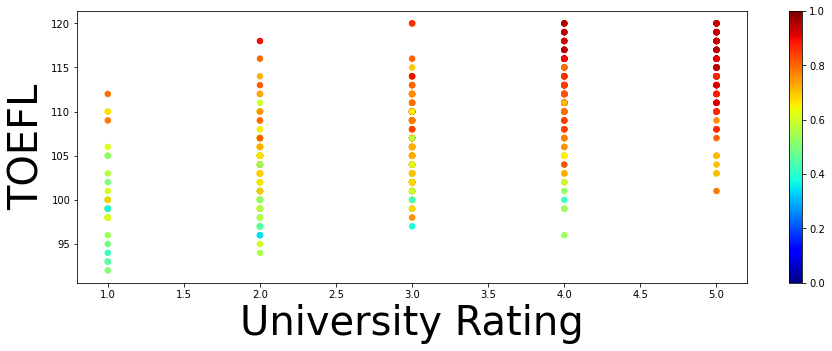

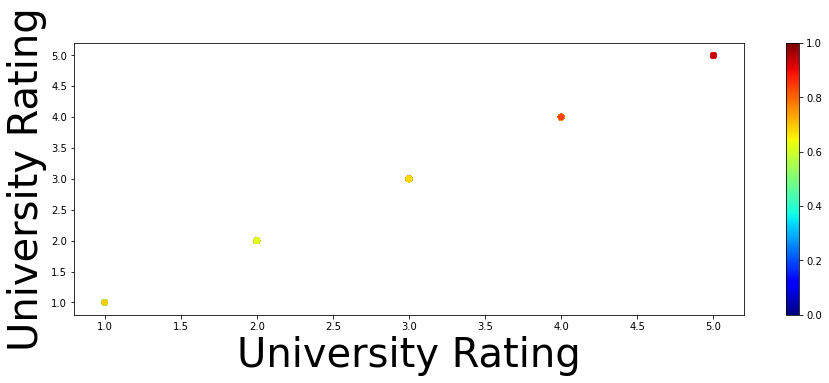

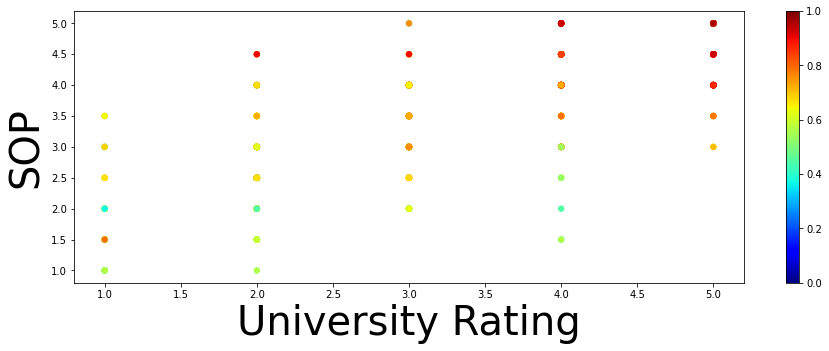

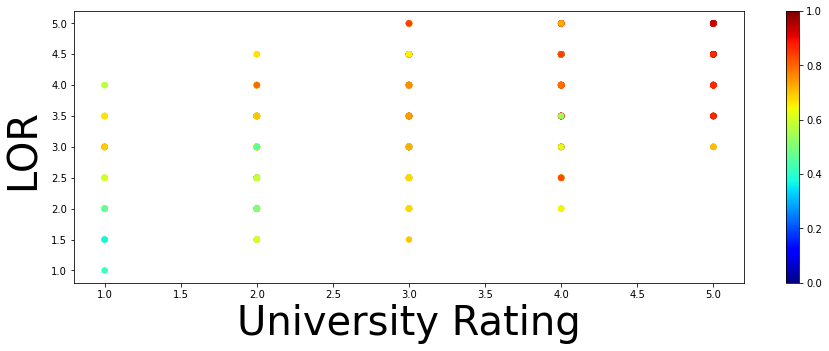

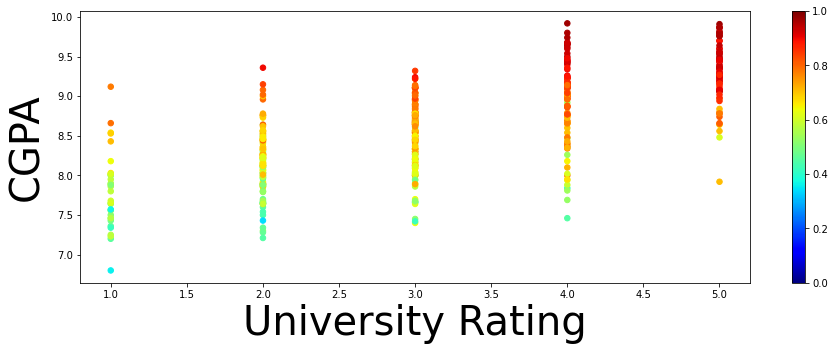

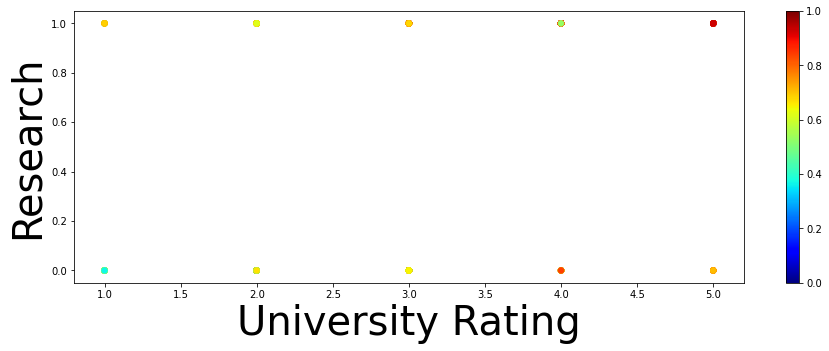

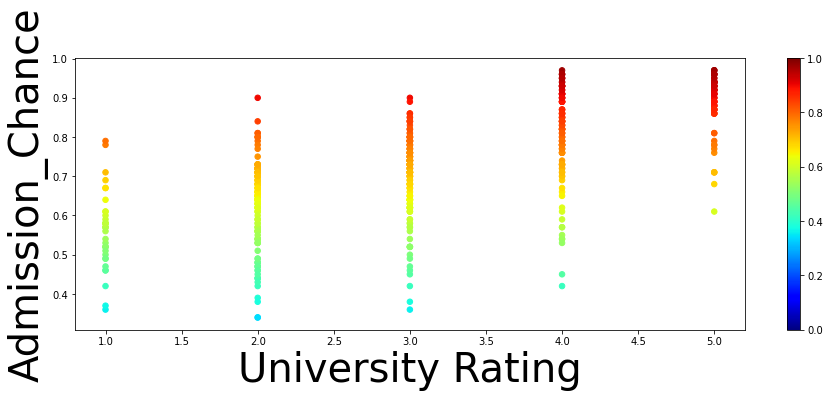

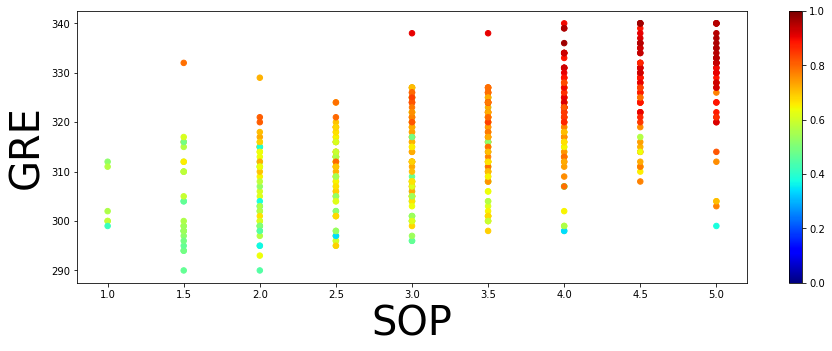

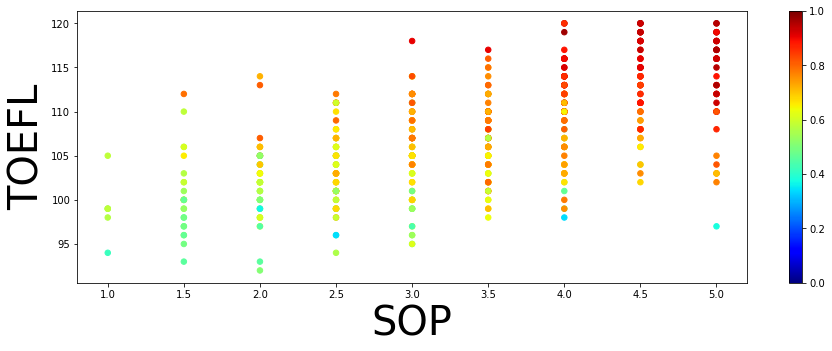

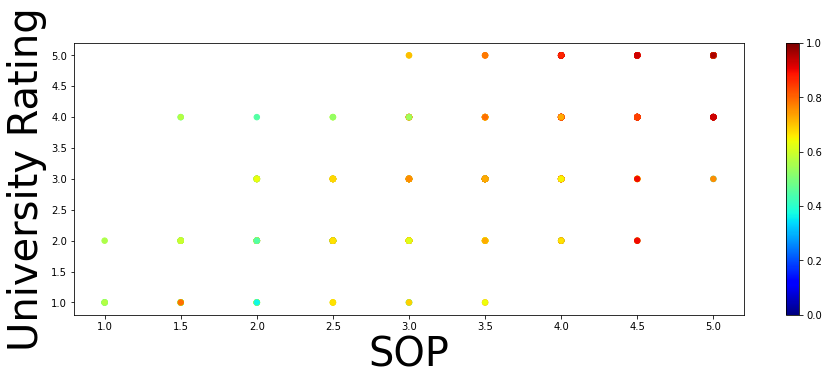

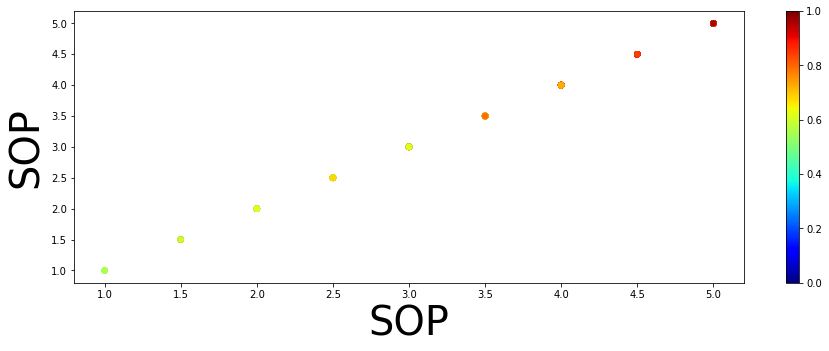

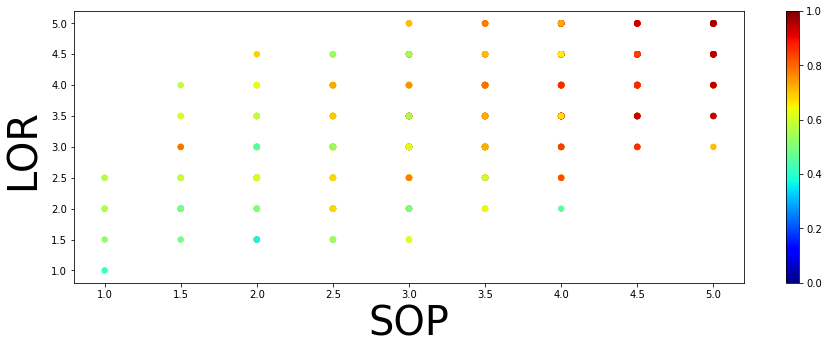

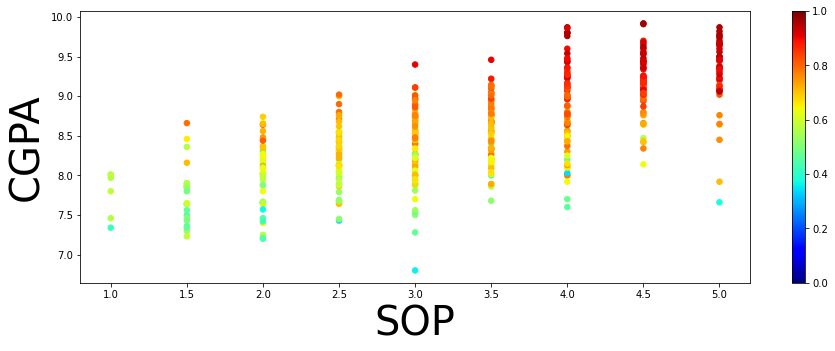

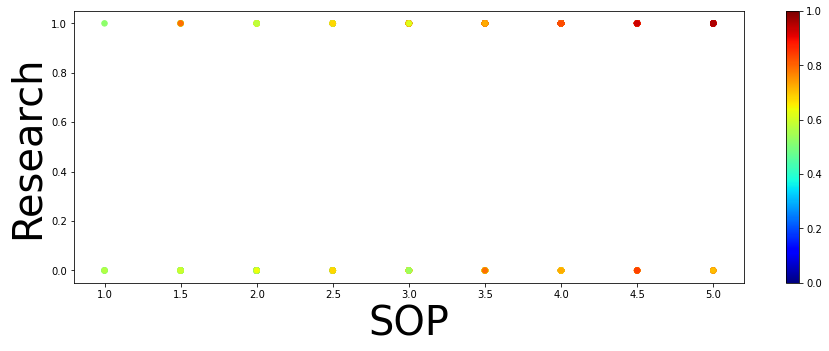

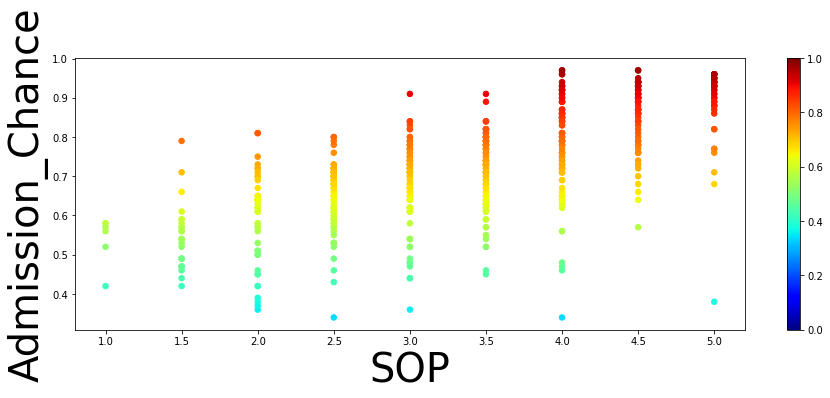

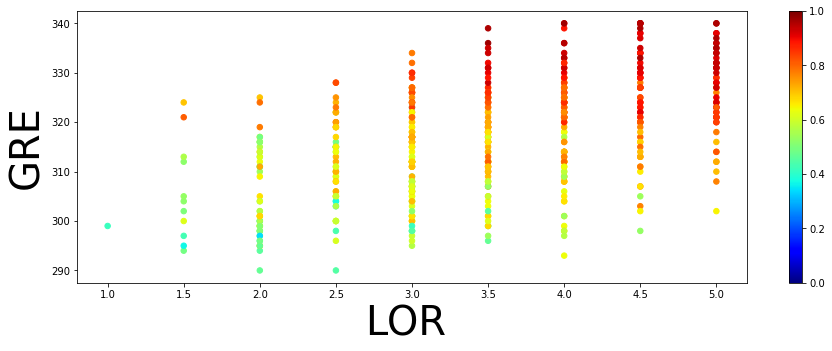

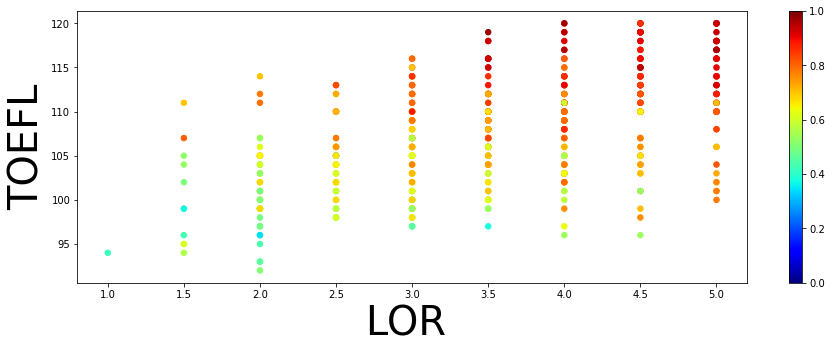

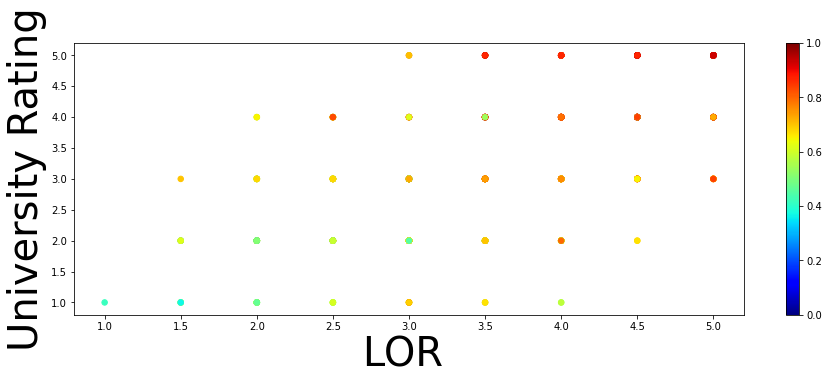

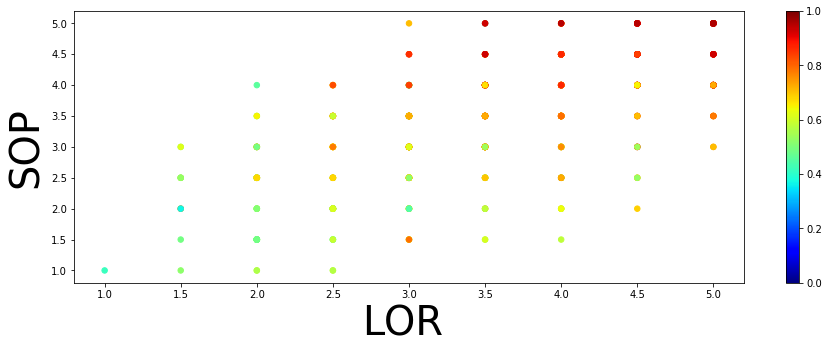

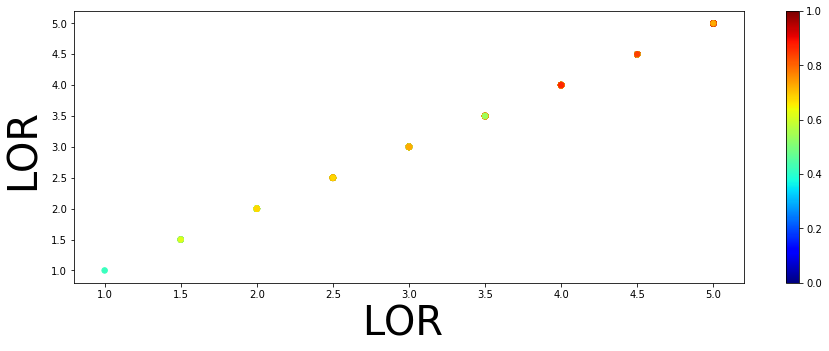

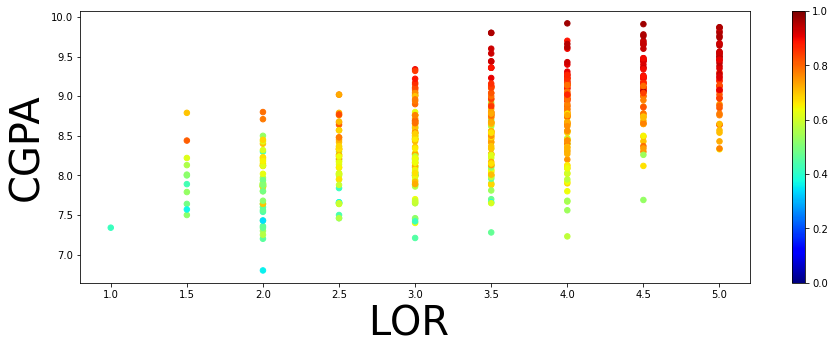

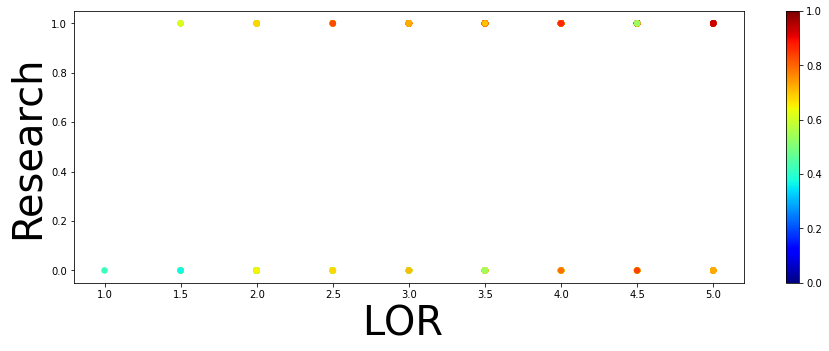

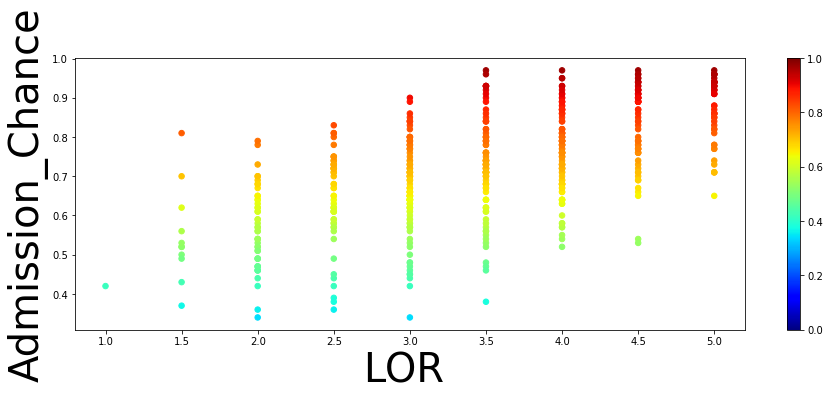

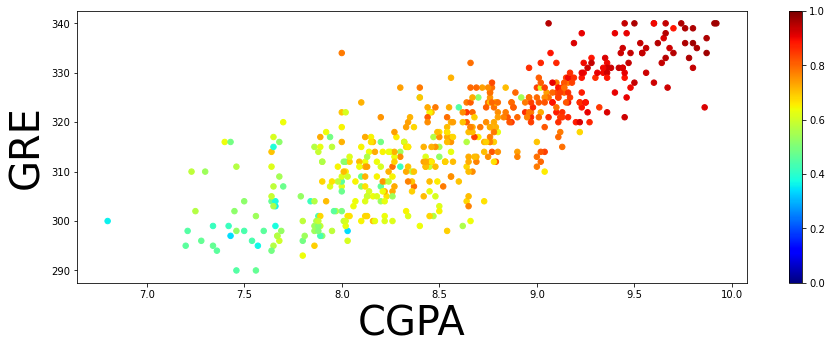

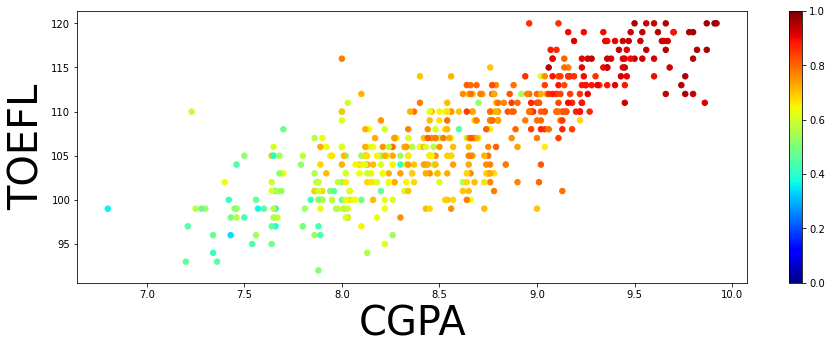

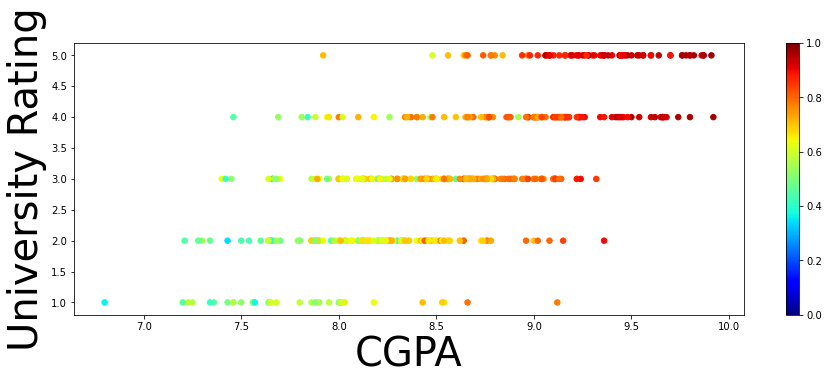

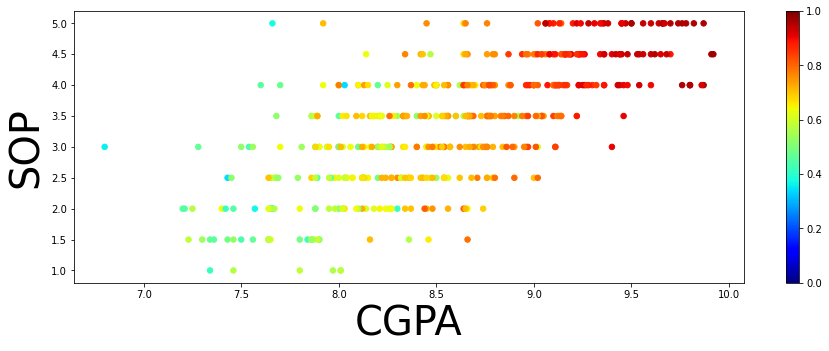

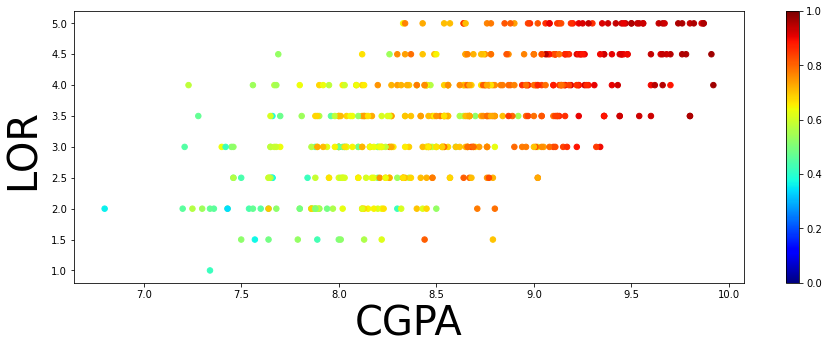

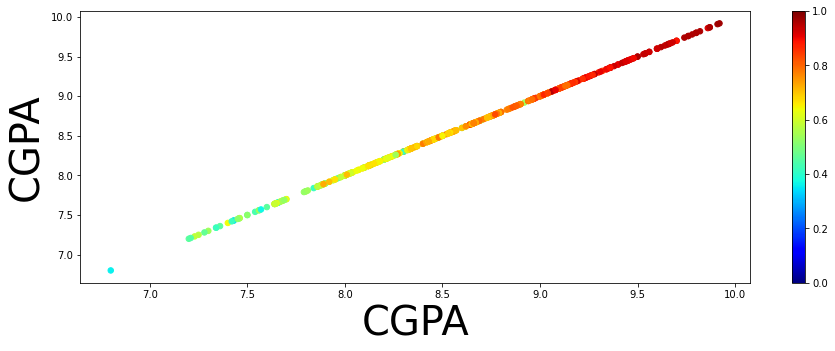

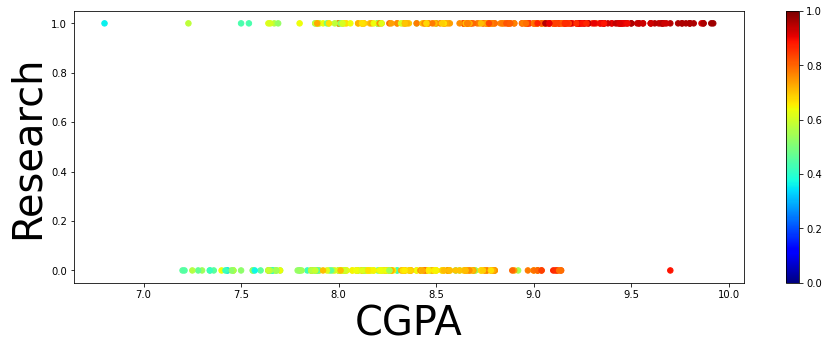

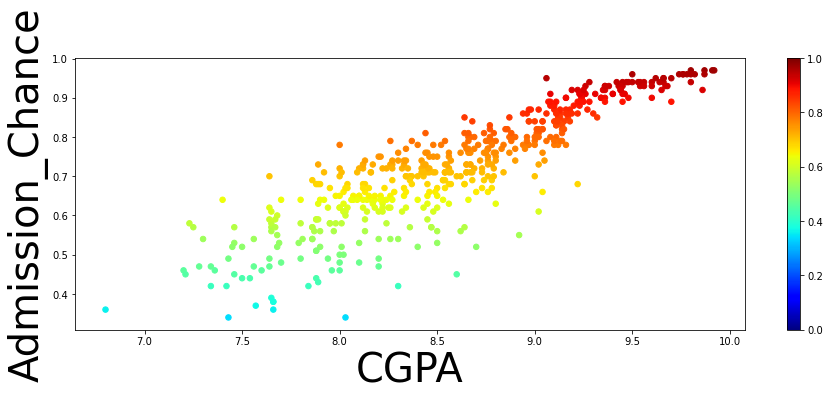

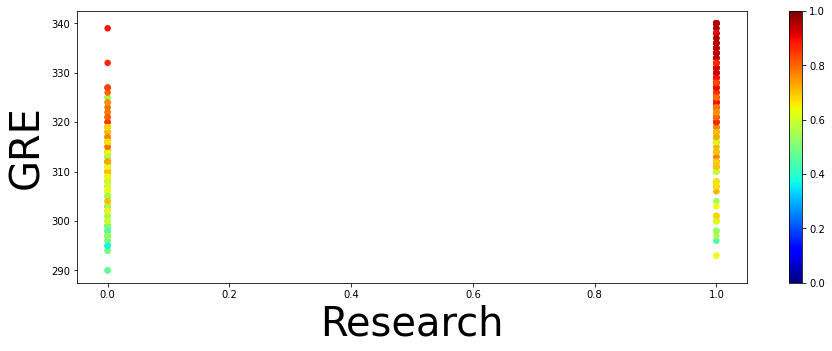

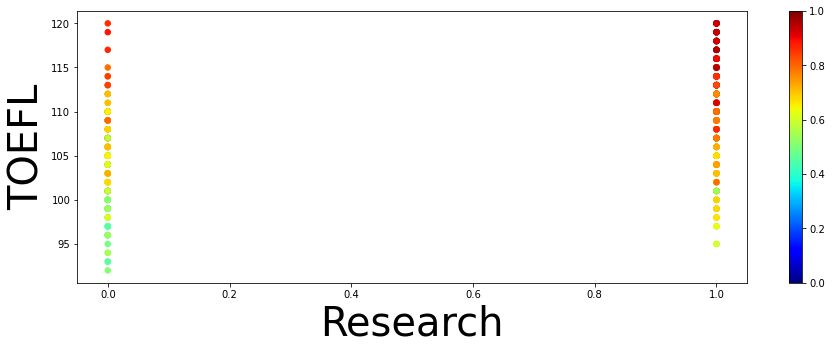

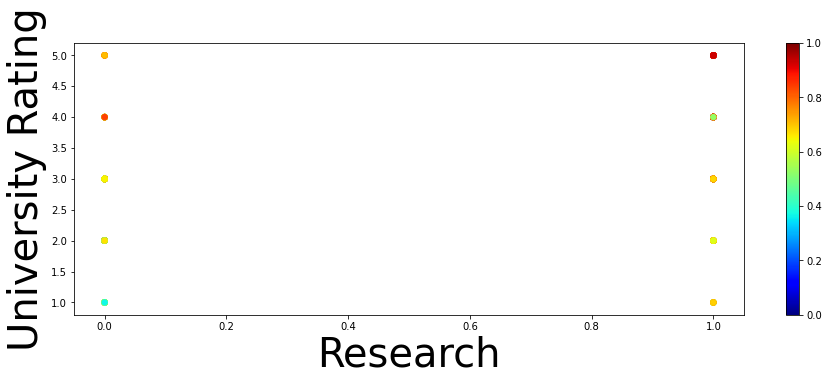

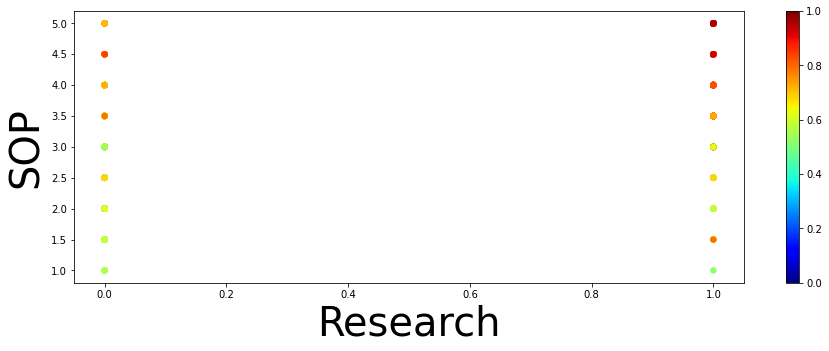

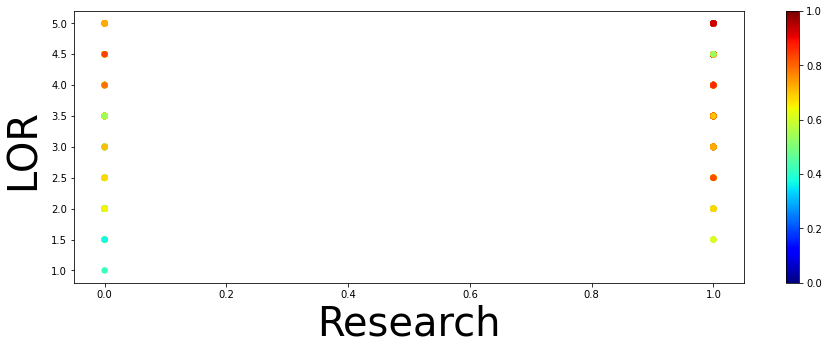

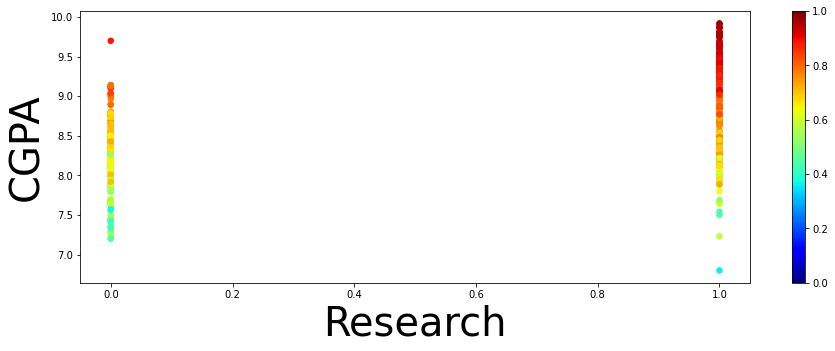

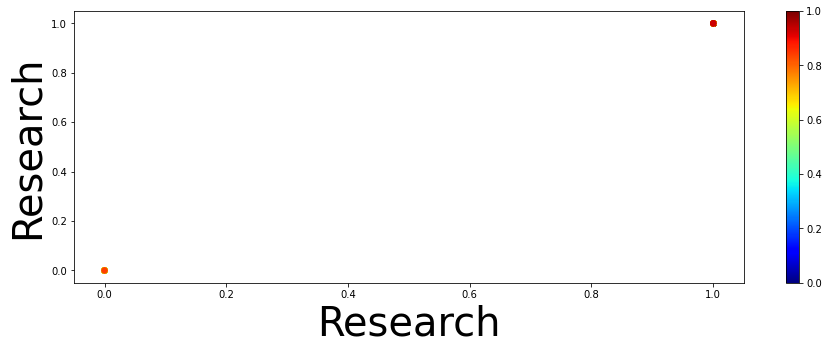

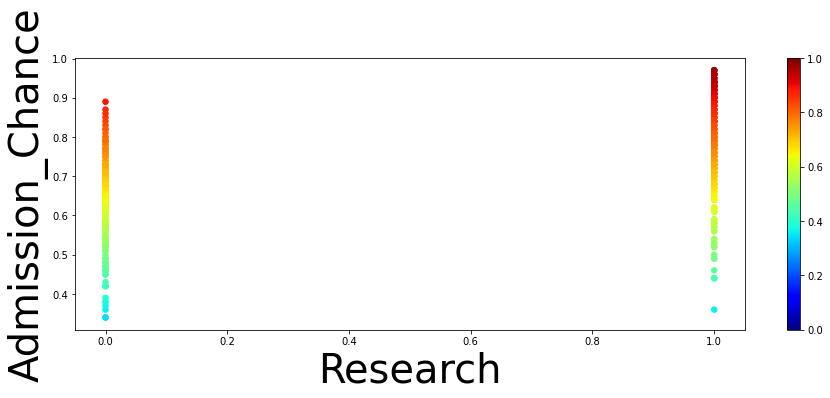

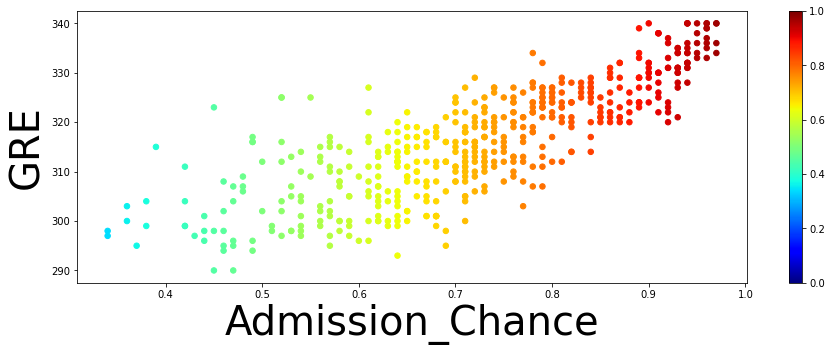

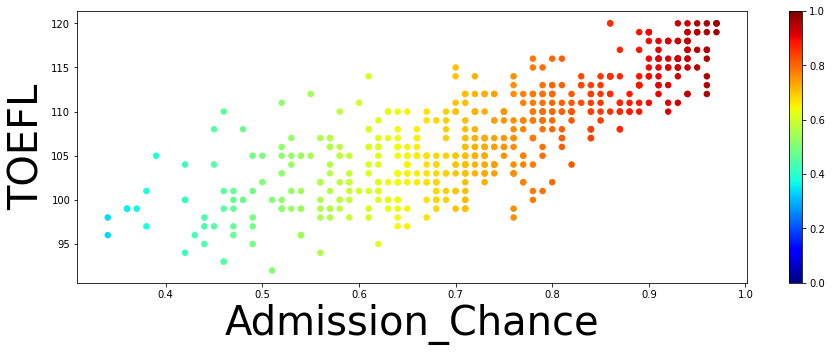

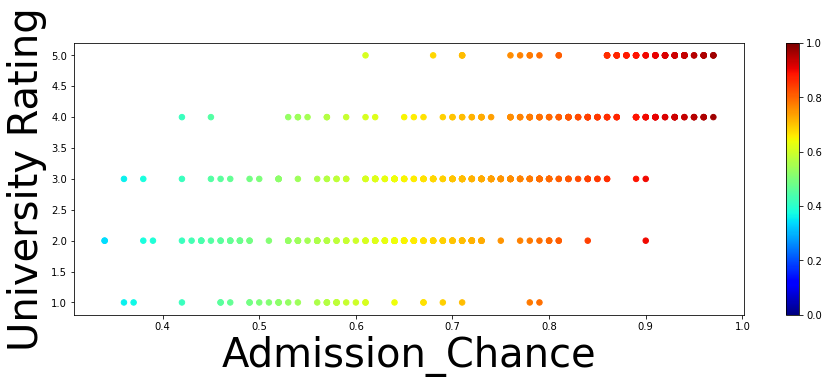

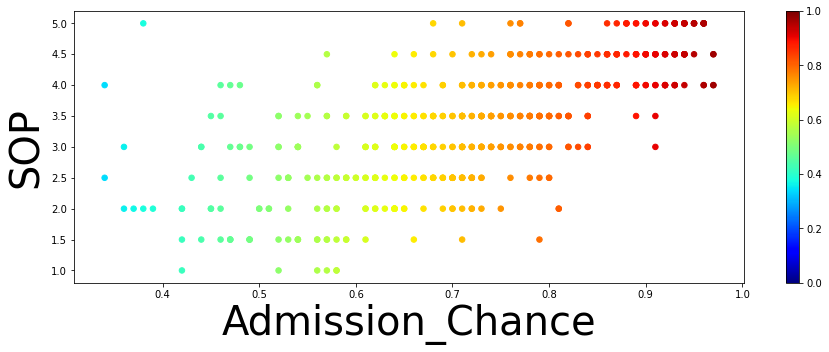

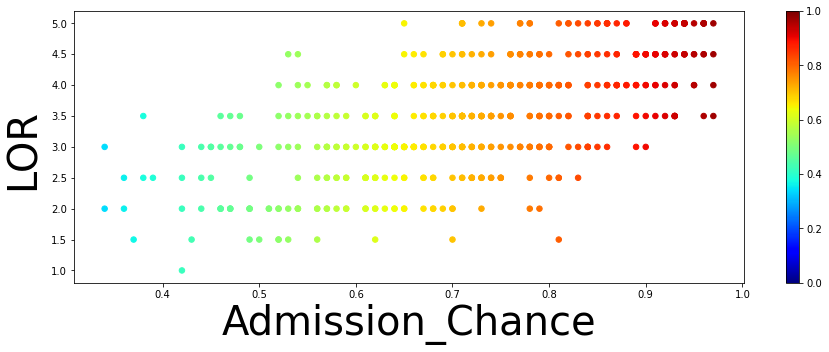

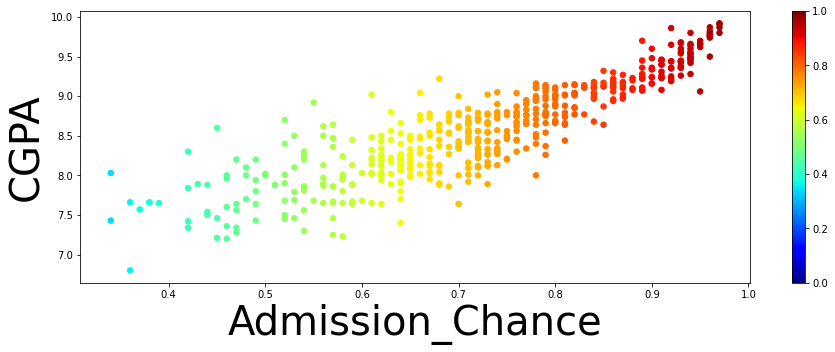

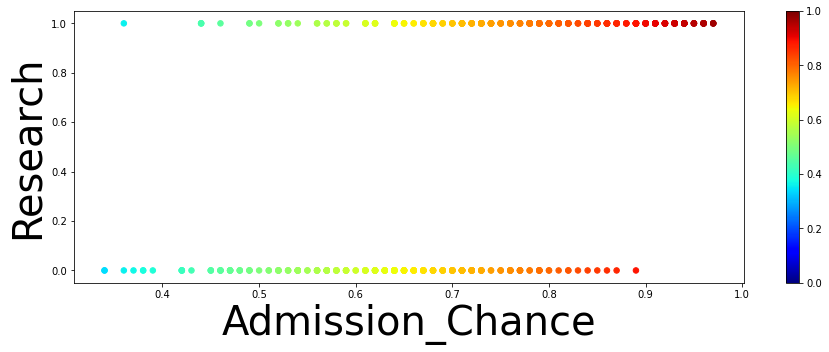

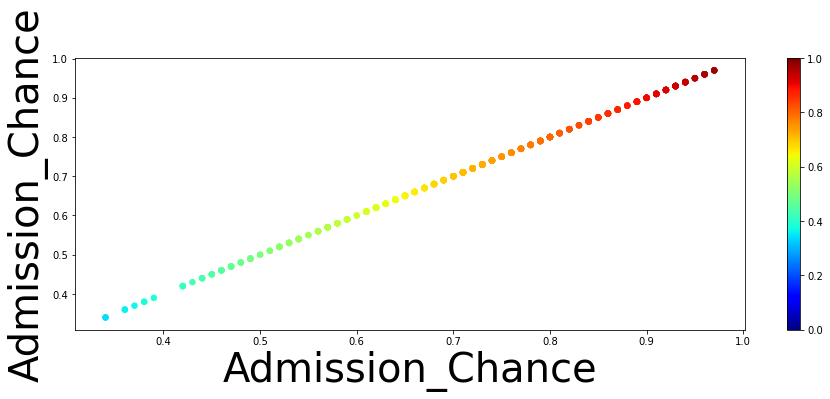

In [290]:
for column_1st in df:
    for coloum_2nd in df:
        jet=plt.get_cmap('jet')
        plt.figure(figsize=(15,5))
        plt.scatter(df[column_1st], df[coloum_2nd], s=30, c=df['Admission_Chance'], vmin=0, vmax=1, cmap=jet)
        plt.xlabel(column_1st,fontsize=40)
        plt.ylabel(coloum_2nd,fontsize=40)
        plt.colorbar()
        plt.show()

In [291]:
X=np.asarray(df.drop("Admission_Chance",axis=1))
Y=np.asarray(df["Admission_Chance"])

In [336]:
X_train, X_test, y_train, y_test = train_test_split(
     X,Y, test_size=0.2, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [337]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
lr_model = regr.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_pred

array([0.61507619, 0.8237639 , 0.75495378, 0.87209457, 0.54683225,
       0.60032933, 0.4688025 , 0.66103121, 0.46302487, 0.72185982,
       0.56297275, 0.67304249, 0.57605843, 0.73062758, 0.87697149,
       0.44312349, 0.80693254, 0.60328224, 0.74412643, 0.47264678,
       0.4498256 , 0.68832358, 0.457349  , 0.92108052, 0.81743806,
       0.69528966, 0.66419914, 0.44231475, 0.52884058, 0.54489769,
       0.69969765, 0.41334732, 0.61128373, 0.82624305, 0.50709869,
       0.53949522, 0.8311047 , 0.85859752, 0.5378931 , 0.61932877,
       0.63159463, 0.89812307, 0.85689852, 0.69222364, 0.74862471,
       0.78668606, 0.97910643, 0.84041294, 0.59906443, 0.61471247,
       0.58779466, 0.58804953, 0.56533621, 0.78276113, 0.658082  ,
       0.84443994, 0.46184277, 0.85310163, 0.5508148 , 0.59177884,
       0.42530945, 0.90436685, 0.57239924, 0.95050666, 0.69133978,
       0.56909568, 0.70382526, 0.83084671, 0.45513193, 0.75532559,
       0.89059586, 0.76450304, 0.65935457, 0.59043229, 0.76658

In [359]:
# define base model
def baseline_model():
    # create model
    model = Sequential()
    
    
    
    model.add(Dense(16, input_dim=7, activation='relu'))
    
    
    model.add(Dense(8, input_dim=7, activation='relu'))
    
    
    model.add(Dense(1))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [360]:
estimator = KerasRegressor(build_fn=baseline_model, epochs=20, batch_size=3, verbose=1)

**For Checking our Model that it is not General we are using Kfolds**

In [361]:
history=estimator.fit(X_train,y_train)

Epoch 1/20
134/134 [==============================] - 0s 948us/step - loss: 0.2701
Epoch 2/20
134/134 [==============================] - 0s 945us/step - loss: 0.0186
Epoch 3/20
134/134 [==============================] - 0s 938us/step - loss: 0.0103
Epoch 4/20
134/134 [==============================] - 0s 933us/step - loss: 0.0077
Epoch 5/20
134/134 [==============================] - 0s 898us/step - loss: 0.0051
Epoch 6/20
134/134 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 7/20
134/134 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 8/20
134/134 [==============================] - 0s 979us/step - loss: 0.0047
Epoch 9/20
134/134 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 10/20
134/134 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 11/20
134/134 [==============================] - 0s 948us/step - loss: 0.0041
Epoch 12/20
134/134 [==============================] - 0s 911us/step - loss: 0.0034
Epoch 13/

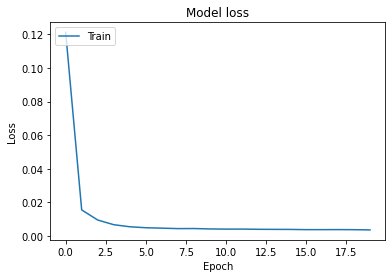

In [362]:
# Plot training & validation loss values
def plotloss(args):
  plt.plot(args)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
hist = history.history['loss']
plotloss(hist)

In [363]:
from sklearn.metrics import accuracy_score
prediction = estimator.predict(X_test)
print(prediction)

34/34 [==============================] - 0s 993us/step
[0.6497476  0.80224246 0.73011535 0.88131946 0.54475856 0.5715766
 0.42666173 0.6789576  0.4361146  0.6653005  0.53866446 0.64465016
 0.58208793 0.7242213  0.87506723 0.33648837 0.7912761  0.5864047
 0.7065954  0.4480049  0.45716885 0.69684863 0.46871603 0.91580606
 0.8087138  0.705358   0.6438061  0.47423667 0.5146589  0.5293292
 0.7075277  0.41355383 0.5656518  0.82850933 0.5046622  0.5922989
 0.7963315  0.83969045 0.4858235  0.6012716  0.5942073  0.88388807
 0.8543831  0.6770864  0.7415149  0.76050735 0.978704   0.8333903
 0.5872479  0.60507905 0.5758975  0.6065607  0.54985267 0.773488
 0.6267768  0.8258599  0.4109754  0.83298373 0.5352259  0.58663183
 0.3831528  0.89527076 0.5594676  0.92210484 0.68993706 0.5738759
 0.70924926 0.8289192  0.40127614 0.76200485 0.8968247  0.7374675
 0.6511672  0.6174209  0.774652   0.8945816  0.7125538  0.69620335
 0.4839123  0.5933546  0.5484628  0.84441906 0.4487084  0.61353725
 0.7512156  0.40

In [364]:
# FN FOR CALCULATING ERRORS OF PREDICTION MODELS
def errors(y_test, prediction):
  train_error =  np.abs(y_test - prediction)
  mean_error = np.mean(train_error)
  min_error = np.min(train_error)
  max_error = np.max(train_error)
  std_error = np.std(train_error)
  print("std_error: ",std_error)
  print("mean_error: ",mean_error)
  print("min_error: ",min_error)
  print("max_error: ",max_error)


In [365]:
print("==== Error for keras model ===")
errors(y_test, prediction)
print("==== Error for sklearn LR model ===")
errors(y_test, lr_pred)  

==== Error for keras model ===
std_error:  0.05408602443603565
mean_error:  0.07329540292024611
min_error:  0.0005073451995849521
max_error:  0.27902460336685175
==== Error for sklearn LR model ===
std_error:  0.048943913129013555
mean_error:  0.06371842190468019
min_error:  0.0009355730189603007
max_error:  0.2281572324296931


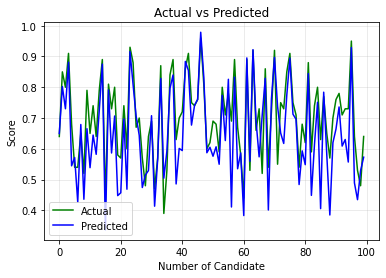

In [366]:
#Visualising the Acutal and predicted Result
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(prediction, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.xlabel('Number of Candidate')
plt.ylabel('Score')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [379]:
from sklearn.metrics import r2_score
def getkerasscore():

  a = r2_score(y_test,prediction)
  
  
  train_prediction = estimator.predict(X_train)
  
  b = r2_score(y_train,train_prediction)

  print("r_square score: ", a)
  
  print("r_square score (train dataset): ", b)
  return(a,b)
getkerasscore()


134/134 [==============================] - 0s 652us/step
r_square score:  0.5248993470541136
r_square score (train dataset):  0.829441695388777


(0.5248993470541136, 0.829441695388777)

In [380]:
'''
print("r_square score: ", r2_score(y_test,prediction))
print("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(estimator.predict(X_test[[1],:])))
print("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(estimator.predict(X_test[[2],:])))

train_prediction = estimator.predict(X_train)
keras_pred = train_prediction
print("r_square score (train dataset): ", r2_score(y_train,train_prediction))

a = r2_score(y_test,model_prediction)
'''


'\nprint("r_square score: ", r2_score(y_test,prediction))\nprint("real value of y_test[1]: " + str(y_test[1]) + " -> the predict: " + str(estimator.predict(X_test[[1],:])))\nprint("real value of y_test[2]: " + str(y_test[2]) + " -> the predict: " + str(estimator.predict(X_test[[2],:])))\n\ntrain_prediction = estimator.predict(X_train)\nkeras_pred = train_prediction\nprint("r_square score (train dataset): ", r2_score(y_train,train_prediction))\n\na = r2_score(y_test,model_prediction)\n'

In [381]:
# Save the weights
def saveweights():
  estimator.model.save_weights('model_weights.h5')
  # Saving the model architecture
  with open('model_architecture.json', 'w') as f:
        f.write(estimator.model.to_json())
  print("Model Wieghts saved successfully")

In [305]:
saveweights()

Model Wieghts saved successfully


In [231]:
def getscore(model_prediction, model_predictor):
  from sklearn.metrics import r2_score
  a = r2_score(y_test,model_prediction)
  train_prediction = model_predictor(X_train)
  b = r2_score(y_train,train_prediction)

  print("r_square score: ", a)
  
  print("r_square score (train dataset): ", b)
  return(a,b)
  
getscore(lr_pred, lr_model.predict)

r_square score:  0.6303672298542349
r_square score (train dataset):  0.8320945273130534


(0.6303672298542349, 0.8320945273130534)

In [382]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [383]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 9))}]


# step-3: perform grid search
# 3.1 specify model
rfe = RFE(lr_model)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [384]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007125,0.002575,0.000688,0.000199,1,{'n_features_to_select': 1},0.707250,0.747216,0.811604,0.814853,0.790863,0.774357,0.041327,8,0.798836,0.792199,0.776485,0.774757,0.780349,0.784525,0.009394
1,0.004268,0.000360,0.000508,0.000012,2,{'n_features_to_select': 2},0.751341,0.789105,0.813617,0.831089,0.805755,0.798181,0.027037,7,0.817048,0.810360,0.804874,0.799033,0.804742,0.807212,0.006085
2,0.003706,0.000421,0.000582,0.000164,3,{'n_features_to_select': 3},0.776716,0.781732,0.811374,0.840166,0.823756,0.806749,0.024311,6,0.829754,0.829200,0.812051,0.815176,0.819059,0.821048,0.007234
3,0.003242,0.000411,0.000586,0.000095,4,{'n_features_to_select': 4},0.789507,0.790465,0.832493,0.839586,0.828746,0.816159,0.021655,1,0.831832,0.832468,0.823774,0.820791,0.823162,0.826405,0.004799
4,0.002274,0.000081,0.000496,0.000020,5,{'n_features_to_select': 5},0.782793,0.798746,0.835044,0.832684,0.829483,0.815750,0.021085,2,0.834176,0.836798,0.829584,0.823763,0.824428,0.829750,0.005167
5,0.001502,0.000029,0.000480,0.000005,6,{'n_features_to_select': 6},0.777968,0.801859,0.834618,0.806152,0.841454,0.812410,0.023124,5,0.834656,0.836987,0.829903,0.835448,0.827507,0.832900,0.003587
6,0.000787,0.000011,0.000486,0.000011,7,{'n_features_to_select': 7},0.794294,0.799567,0.836148,0.806001,0.838348,0.814871,0.018656,3,0.836522,0.837152,0.829982,0.835474,0.827777,0.833381,0.003780
7,0.000794,0.000009,0.000495,0.000029,8,{'n_features_to_select': 8},0.794294,0.799567,0.836148,0.806001,0.838348,0.814871,0.018656,3,0.836522,0.837152,0.829982,0.835474,0.827777,0.833381,0.003780


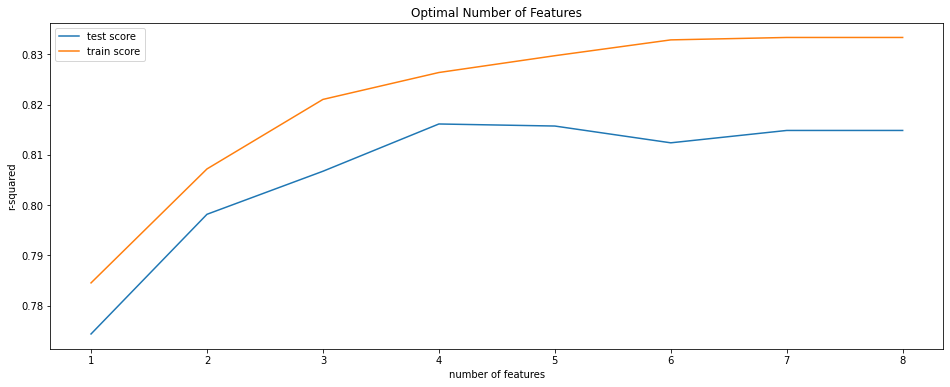

In [385]:
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [386]:
# final sklearn LR model
n_features_optimal = 8

regr = LinearRegression()
lr_model = regr.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_pred

rfe = RFE(lr_model, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

#r2 = sklearn.metrics.r2_score(y_test, y_pred)
r2 = r2_score(y_test, lr_pred)
print(r2)

0.6303672298542349


In [387]:
r2_k = r2_score(y_test,prediction)
r2_k

0.5248993470541136

In [388]:
#scores = cross_val_score(lr_model, X_train, y_train, scoring='r2', cv=10)
def scoresinfo(modelname, parts):
  s = cross_val_score(modelname, X_train, y_train, scoring='r2', cv=parts)
  print("Scores for {}:" .format(modelname), s)
  print("Minimum Socore :",s.min())
  print("Max. score :", s.max())
  print("Mean score:" , s.mean())
 
scoresinfo(lr_model, 10)

Scores for LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False): [0.83979159 0.74669545 0.68981832 0.82745658 0.89457113 0.81685284
 0.87181963 0.77312701 0.90730464 0.74703627]
Minimum Socore : 0.6898183241058362
Max. score : 0.907304635204317
Mean score: 0.8114473470379785


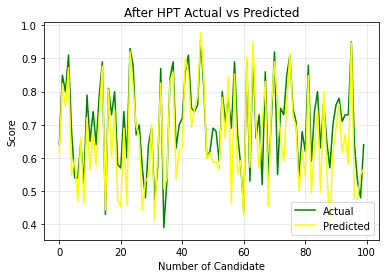

In [389]:
#Visualising the Acutal and predicted Result
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(lr_pred, color = 'yellow', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.xlabel('Number of Candidate')
plt.ylabel('Score')
plt.title('After HPT Actual vs Predicted')
plt.legend()
plt.show()

In [410]:
#print(getscore(lr_pred, lr_model.predict), getkerasscore())
r2k = list(getkerasscore())
r2sk = list(getscore(lr_pred, lr_model.predict))

134/134 [==============================] - 0s 748us/step
r_square score:  0.5248993470541136
r_square score (train dataset):  0.829441695388777
r_square score:  0.6303672298542349
r_square score (train dataset):  0.8320945273130534


In [409]:
#r2_score(y_test,prediction)
r2keras = r2_score(y_train,train_prediction)
r2sklearn = r2_score(y_test, lr_pred)
scoresdf = pd.DataFrame(columns= ["Type of Score", "Keras Model", "Skl Model"])
scoresdf["Type of Score"] = ["r_square score", "r_square score (train dataset)"]
scoresdf["Keras Model"] = r2k
scoresdf["Skl Model"] = r2sk
scoresdf

,Type of Score,Keras Model,Skl Model
0,r_square score,0.524899,0.630367
1,r_square score (train dataset),0.829442,0.832095


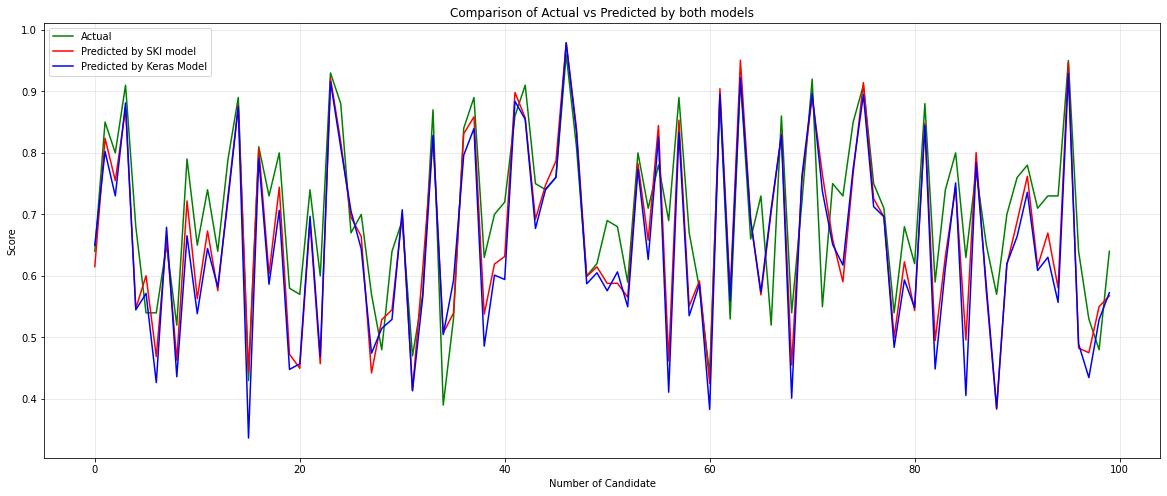

In [391]:
#Visualising the Acutal and predicted Result
fig = plt.figure(figsize= [20,8])
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(y_pred, color = 'red', label = 'Predicted by SKl model')
plt.plot(prediction, color = 'blue', label = 'Predicted by Keras Model')

plt.grid(alpha = 0.3)
plt.xlabel('Number of Candidate')
plt.ylabel('Score')
plt.title('Comparison of Actual vs Predicted by both models')
plt.legend()
plt.show()